
# Shark attacks during summer vs. other season

## Obtaining the data and checking the information

In [31]:
import numpy as np
import pandas as pd
import warnings
import matplotlib as plt
import seaborn as sns

In [ ]:
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/attacks.csv", encoding='cp1252')# due to a error of encoding we include which one we need to include

In [3]:
df.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
10201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning process

In [4]:
import src.cleaning as clean

In [5]:
df = clean.column_na(df) # cleaning columns

In [6]:
df = clean.drop_duplicates(df) # dropping duplicates and NaN values

In [9]:
df = clean.clean_country(df) # removing whitespaces and lower-case

In [10]:
df = clean.replace_country_values(df) # replacing some countries which wouldn't match with df-country_list

## Preparing data for analysis

### Obtaining a list of all the countries with latitude to determine wether are from the north or south.

In [11]:
l_country= pd.read_csv('data/list_country.csv') 
l_country.latitude.isna().sum() # Obtaining a dataframe with the list of countries and their coordinates we can find there's a NaN value

1

In [12]:
l_country.dropna(how= 'any',inplace= True) # so, we remove the NaN row as we can't say if North or South

In [13]:
import src.analysis as analysis

In [14]:
l_country = analysis.list_country_hemisphere(l_country) # filtering countries wether are north or south

In [15]:
south_list = analysis.cleaning_ref(l_country) 

In [16]:
import src.combination as comb

In [17]:
df_concat = comb.combine_ref_df(df, south_list) 

In [18]:
df_concat

,Date,Year,hemisphere
Country,,,
united states,25-Jun-2018,2018.0,north
united states,18-Jun-2018,2018.0,north
united states,09-Jun-2018,2018.0,north
australia,08-Jun-2018,2018.0,south
mexico,04-Jun-2018,2018.0,north
...,...,...,...
australia,Before 1906,0.0,south
australia,Before 1903,0.0,south
united states,1900-1905,0.0,north


## Creating the seasons according to the hemisphere

In [19]:
import src.concat as cct

In [20]:
df_concat= cct.concat_month(df_concat)

In [21]:
df_south = df_concat.loc[df_concat['hemisphere'] == "south"] #creating a subset for southern countries

In [22]:
df_north = df_concat.loc[df_concat['hemisphere'] == "north"] #creating a subset for northern countries

In [23]:
df_south.sample()

,Date,Year,hemisphere,month
Country,,,,
french polynesia,04-Aug-2012,2012.0,south,Aug


In [24]:
df_south['season'] = df_south['month'].map(lambda month:cct.south_season(month)) 
#creating a new column iterating in between the month and season according to the hemisphere

In [25]:
df_south.sample()

,Date,Year,hemisphere,month,season
Country,,,,,
australia,05-Mar-1863,1863.0,south,Mar,Autumn


In [26]:
df_north['season'] = df_north['month'].map(lambda month:cct.north_season(month))
#creating a new column iterating in between the month and season according to the hemisphere

In [27]:
df_north.sample()

,Date,Year,hemisphere,month,season
Country,,,,,
united states,09-Apr-2003,2003.0,north,Apr,Spring


In [28]:
df_south.sample()

,Date,Year,hemisphere,month,season
Country,,,,,
australia,19-Jan-2012,2012.0,south,Jan,Summer


In [29]:
x= df_north.hemisphere.count() - df_south.hemisphere.count()
print(f"The total amount of attacks found in the north is {df_north.hemisphere.count()}, meanwhile, in the south is {df_south.hemisphere.count()}")
print (f"This gives a difference os {x} more in the North")

The total amount of attacks found in the north is 2808, meanwhile, in the south is 2225
This gives a difference os 583 more in the North


## Extracting the data

In [32]:
import src.graphs as gp

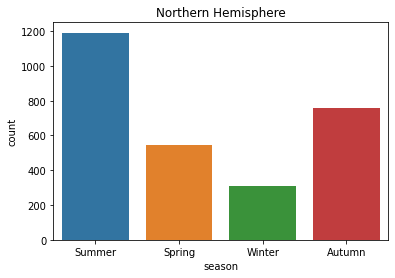

In [37]:
graph_north = gp.extract_data_north(df_north);

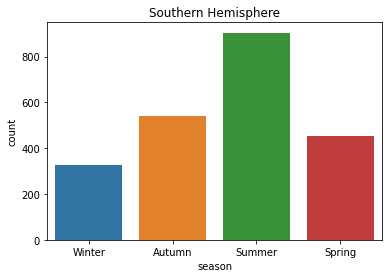

In [38]:
graph_south = gp.extract_data_sout(df_south)

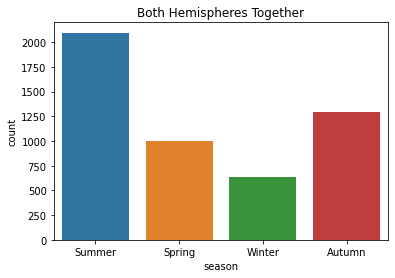

In [39]:
graph_together = gp.extract_data_together(df_north, df_south)

## Saving graphs

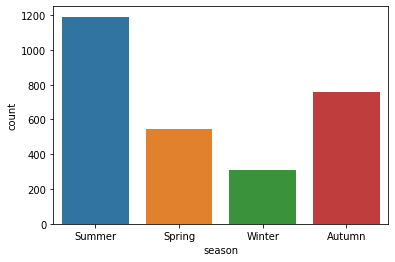

In [40]:
north = sns.countplot(x="season", data=df_north, label= "Northern hemisphere");
north.figure.savefig("North.jpg", dpi=1000)

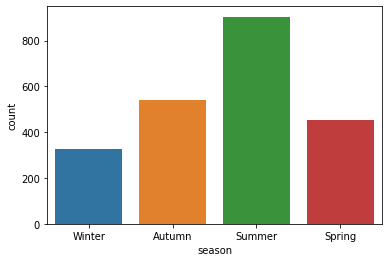

In [41]:
south = sns.countplot(x="season", data=df_south, label= "Southern hemisphere");
south.figure.savefig("South.jpg", dpi=1000)